In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics

### Ensemble Learning can help you to build a really robust model from a few “weak” models, which eliminates a lot of the model tuning that would else be needed to achieve good results.  

## Averageing and Weighted Averageing

In [2]:
test_pre1 = [1.2, 3.2, 2.1, 6.2]
test_pre2 = [0.9, 3.1, 2.0, 5.9]
test_pre3 = [1.1, 2.9, 2.2, 6.0]

y_test_true = [1, 3, 2, 6]

In [3]:
def Weighted_method(test_pre1,test_pre2,test_pre3,w=[1/3,1/3,1/3]):
    Weighted_result = w[0]*pd.Series(test_pre1)+w[1]*pd.Series(test_pre2)+w[2]*pd.Series(test_pre3)
    return Weighted_result

In [5]:
## Mean Absolute Error, also known as MAE, is one of the many metrics for summarizing and assessing the quality of a machine learning model.
print('Pred1 MAE:',metrics.mean_absolute_error(y_test_true, test_pre1))
print('Pred2 MAE:',metrics.mean_absolute_error(y_test_true, test_pre2))
print('Pred3 MAE:',metrics.mean_absolute_error(y_test_true, test_pre3))

Pred1 MAE: 0.1750000000000001
Pred2 MAE: 0.07499999999999993
Pred3 MAE: 0.10000000000000009


In [19]:
#based on weighted average
w = [0.3,0.4,0.3] # 定义比重权值
Weighted_pre = Weighted_method(test_pre1,test_pre2,test_pre3,w)
print(Weighted_pre)
print('Weighted_pre MAE:',metrics.mean_absolute_error(y_test_true, Weighted_pre))

0    1.05
1    3.07
2    2.09
3    6.02
dtype: float64
Weighted_pre MAE: 0.05750000000000027


In [9]:
def Mean_method(test_pre1,test_pre2,test_pre3):
    Mean_result = pd.concat([pd.Series(test_pre1),pd.Series(test_pre2),pd.Series(test_pre3)],axis=1)
    return Mean_result

In [11]:
Mean_pre = Mean_method(test_pre1,test_pre2,test_pre3)
print(Mean_pre)

0    1    2
0  1.2  0.9  1.1
1  3.2  3.1  2.9
2  2.1  2.0  2.2
3  6.2  5.9  6.0


In [10]:
print('Mean_pre MAE:',metrics.mean_absolute_error(y_test_true, Mean_pre))

ValueError: y_true and y_pred have different number of output (1!=3)

In [13]:
def Median_method(test_pre1,test_pre2,test_pre3):
    Median_result = pd.concat([pd.Series(test_pre1),pd.Series(test_pre2),pd.Series(test_pre3)],axis=1)
    return Median_result

In [21]:
Median_pre = Median_method(test_pre1,test_pre2,test_pre3)
print(Median_pre.stack().median())
print('Median_pre MAE:',metrics.mean_absolute_error(y_test_true, Median_pre.median()))

2.55


ValueError: Found input variables with inconsistent numbers of samples: [4, 3]

In [38]:
from sklearn import linear_model
def Stacking_method(train_reg1,train_reg2,train_reg3,y_train_true,test_pre1,test_pre2,test_pre3,mode):
    model_L2.fit(pd.concat([pd.Series(train_reg1),pd.Series(train_reg2),pd.Series(train_reg3)],axis=1),y_train_true)
    Stacking_result = model_L2.predict(pd.concat([pd.Series(test_pre1),pd.Series(test_pre2),pd.Series(test_pre3)],axis=1))
    return Stacking_result

In [28]:
train_reg1 = [3.2, 8.2, 9.1, 5.2]
train_reg2 = [2.9, 8.1, 9.0, 4.9]
train_reg3 = [3.1, 7.9, 9.2, 5.0]
y_train_true = [3, 8, 9, 5]
test_pre1 = [1.2, 3.2, 2.1, 6.2]
test_pre2 = [0.9, 3.1, 2.0, 5.9]
test_pre3 = [1.1, 2.9, 2.2, 6.0]
y_test_true = [1, 3, 2, 6]

In [39]:
model_L2= linear_model.LinearRegression()
Stacking_pre = Stacking_method(train_reg1,train_reg2,train_reg3,y_train_true,
test_pre1,test_pre2,test_pre3,model_L2)
print('Stacking_pre MAE:',metrics.mean_absolute_error(y_test_true, Stacking_pre))

Stacking_pre MAE: 0.04213483146067476


In [40]:
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Voting

In [43]:
iris = datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
clf1 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=3, min_child_weight=2, subsample_bytree = 0.4,
                colsample_bytree=0.6, objective='binary:logistic')
clf2 = RandomForestClassifier(n_estimators=50, max_depth=1, min_samples_split=4,
            min_samples_leaf=63,oob_score=True)
clf3 = SVC(C=0.1)
# 硬投票
eclf = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['XGBBoosting', 'Random Forest', 'SVM', 'Ensemble']) :
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.02) [XGBBoosting]
Accuracy: 0.33 (+/- 0.00) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [SVM]
Accuracy: 0.92 (+/- 0.03) [Ensemble]


In [45]:
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
clf1 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=3, min_child_weight=2, subsample_bytree = 0.4,
                    colsample_bytree=0.8, objective='binary:logistic')
clf2 = RandomForestClassifier(n_estimators=50, max_depth=1, min_samples_split=4,
                    min_samples_leaf=63,oob_score=True)
clf3 = SVC(C=0.1, probability=True)
# 软投票
eclf = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2), ('svc', clf3)], voting='soft', weights=[1/3,1/3,1/3])
clf1.fit(x_train, y_train)
for clf, label in zip([clf1, clf2, clf3, eclf], ['XGBBoosting', 'Random Forest', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.02) [XGBBoosting]
Accuracy: 0.33 (+/- 0.00) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [SVM]
Accuracy: 0.96 (+/- 0.02) [Ensemble]


## Stacking
### It is a method that uses k-fold for training base models which then make predictions on the left out fold. These so-called out of fold predictions are then used to train another model — the meta model — which can use the information produced by the base models to make final predictions.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
import pandas as pd

In [47]:
data_0 = iris.data
data = data_0[:100,:]
target_0 = iris.target
target = target_0[:100]

In [48]:
clfs = [LogisticRegression(solver='lbfgs'),
    RandomForestClassifier(n_estimators=5, n_jobs=-1, criterion='gini'),
    ExtraTreesClassifier(n_estimators=5, n_jobs=-1, criterion='gini'),
    ExtraTreesClassifier(n_estimators=5, n_jobs=-1, criterion='entropy'),
    GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=5)]

In [49]:
X, X_predict, y, y_predict = train_test_split(data, target, test_size=0.3, random_state=2020)
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

In [50]:
n_splits = 5
skf = StratifiedKFold(n_splits)
skf = skf.split(X, y)

In [51]:
for j, clf in enumerate(clfs):
    #training model
    dataset_blend_test_j = np.zeros((X_predict.shape[0], 5))
    for i, (train, test) in enumerate(skf):
    #5-fold cross validation.
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_predict)[:, 1]
    #use the mean of predicted values as new features in test dataset.
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)
    print("val auc Score: %f" % roc_auc_score(y_predict, dataset_blend_test[:, j]))

val auc Score: 1.000000
val auc Score: 0.500000
val auc Score: 0.500000
val auc Score: 0.500000
val auc Score: 0.500000


In [52]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(dataset_blend_train, y)
y_submission = clf.predict_proba(dataset_blend_test)[:, 1]
print("Val auc Score of Stacking: %f" % (roc_auc_score(y_predict, y_submission)))

Val auc Score of Stacking: 1.000000


## Blending
Instead of creating out-of-fold predictions using kfold you create a small holdout data-set which will then be used to train the meta-model.   <br>
 Step One: Divede dataset into training part and test part  <br>
 Step Two: Using training dataset to predict labels in testing dataset  <br>
 Step Three: Use the labels in testing dataset as new features. Add it into training labels. Training the models again.

In [62]:
data_0 = iris.data
data = data_0[:100,:]
target_0 = iris.target
target = target_0[:100]
#模型融合中使用到的各个单模型
clfs = [LogisticRegression(solver='lbfgs'),
RandomForestClassifier(n_estimators=5, n_jobs=-1, criterion='gini'),
RandomForestClassifier(n_estimators=5, n_jobs=-1, criterion='entropy'),
ExtraTreesClassifier(n_estimators=5, n_jobs=-1, criterion='gini'),
#ExtraTreesClassifier(n_estimators=5, n_jobs=-1, criterion='entropy'),
GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=5)]

In [54]:
X, X_predict, y, y_predict = train_test_split(data, target, test_size=0.3, random_state=2020)

In [55]:
X_d1, X_d2, y_d1, y_d2 = train_test_split(X, y, test_size=0.5, random_state=2020)
dataset_d1 = np.zeros((X_d2.shape[0], len(clfs)))
dataset_d2 = np.zeros((X_predict.shape[0], len(clfs)))

In [56]:
for j, clf in enumerate(clfs):
#training modelss
    clf.fit(X_d1, y_d1)
    y_submission = clf.predict_proba(X_d2)[:, 1]
    dataset_d1[:, j] = y_submission
    #take the predicted values as new features
    dataset_d2[:, j] = clf.predict_proba(X_predict)[:, 1]
    print("val auc Score: %f" % roc_auc_score(y_predict, dataset_d2[:, j]))

val auc Score: 1.000000
val auc Score: 1.000000
val auc Score: 1.000000
val auc Score: 1.000000
val auc Score: 1.000000


In [57]:
clf = GradientBoostingClassifier(learning_rate=0.02, subsample=0.5, max_depth=6, n_estimators=30)
clf.fit(dataset_d1, y_d2)
y_submission = clf.predict_proba(dataset_d2)[:, 1]
print("Val auc Score of Blending: %f" % (roc_auc_score(y_predict, y_submission)))

Val auc Score of Blending: 1.000000


In [58]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions


In [59]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
meta_classifier=lr)
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)
clf_cv_mean = []
clf_cv_std = []

<Figure size 720x576 with 0 Axes>

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [Stacking Classifier]


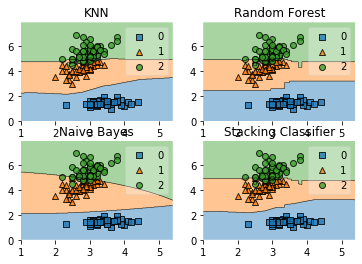

In [61]:
for clf, label, grd in zip(clf_list, label, grid):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)
plt.show()

In [74]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
Train_data = pd.read_csv('C://Users//Sherry Yang//Documents//Python Scripts//used_car_train_20200313//used_car_train_20200313.csv', sep=' ')
TestA_data = pd.read_csv('C://Users//Sherry Yang//Documents//Python Scripts//used_car_testA_20200313//used_car_testA_20200313.csv', sep=' ')
print(Train_data.shape)
print(TestA_data.shape)

(150000, 31)
(50000, 30)


In [65]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [66]:
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [67]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','regDate','price']]

In [68]:
X_data = Train_data[feature_cols]
Y_data = Train_data['price']
X_test = TestA_data[feature_cols]
print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

X train shape: (150000, 26)
X test shape: (50000, 26)


In [69]:
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

In [70]:
print('Sta of label:')
Sta_inf(Y_data)

Sta of label:
_min 11
_max: 99999
_mean 5923.327333333334
_ptp 99988
_std 7501.973469876438
_var 56279605.94272992


In [71]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [72]:
def build_model_lr(x_train,y_train):
    reg_model = linear_model.LinearRegression()
    reg_model.fit(x_train,y_train)
    return reg_model
def build_model_ridge(x_train,y_train):
    reg_model = linear_model.Ridge(alpha=0.8)#alphas=range(1,100,5)
    reg_model.fit(x_train,y_train)
    return reg_model
def build_model_lasso(x_train,y_train):
    reg_model = linear_model.LassoCV()
    reg_model.fit(x_train,y_train)
    return reg_model
def build_model_gbdt(x_train,y_train):
    estimator =GradientBoostingRegressor(loss='ls',subsample= 0.85,max_depth= 5,n_estimators = 100)
    param_grid = {
    'learning_rate': [0.05,0.08,0.1,0.2],
    }
    gbdt = GridSearchCV(estimator, param_grid,cv=3)
    gbdt.fit(x_train,y_train)
    print(gbdt.best_params_)
# print(gbdt.best_estimator_ )
    return gbdt
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=120, learning_rate=0.08, gamma=0, subsample=0.8,\
    colsample_bytree=0.9, max_depth=5) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model
def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=63,n_estimators = 100)
    param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm

In [75]:
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, subsample=0.8,\
colsample_bytree=0.9, max_depth=7) # ,objective ='reg:squarederror'
scores_train = []
scores = []

In [77]:
sk=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
        train_x=X_data.iloc[train_ind].values
        train_y=Y_data.iloc[train_ind]
        val_x=X_data.iloc[val_ind].values
        val_y=Y_data.iloc[val_ind]
        xgr.fit(train_x,train_y)
        pred_train_xgb=xgr.predict(train_x)
        pred_xgb=xgr.predict(val_x)
        score_train = mean_absolute_error(train_y,pred_train_xgb)
        scores_train.append(score_train)
        score = mean_absolute_error(val_y,pred_xgb)
        scores.append(score)
print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

[14:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)
## Train and Predict
print('Predict LR...')
model_lr = build_model_lr(x_train,y_train)
val_lr = model_lr.predict(x_val)
subA_lr = model_lr.predict(X_test)
print('Predict Ridge...')
model_ridge = build_model_ridge(x_train,y_train)
val_ridge = model_ridge.predict(x_val)
subA_ridge = model_ridge.predict(X_test)
print('Predict Lasso...')
model_lasso = build_model_lasso(x_train,y_train)
val_lasso = model_lasso.predict(x_val)
subA_lasso = model_lasso.predict(X_test)
print('Predict GBDT...')
model_gbdt = build_model_gbdt(x_train,y_train)
val_gbdt = model_gbdt.predict(x_val)
subA_gbdt = model_gbdt.predict(X_test)